## Lab 3 for the Tech Savy
## Description: What are we looking for?

### I would like to identify the most common passwords used in a particular country, why are they like that? Is there a correlation/similarities? Can we automate the look for common trends and passwords with machine learning?
#### This is important because i helps security professionals identify patterns and trends that may make it easier for attackers to guess or crack passwords. This information can be used to create stronger password policies and to educate users about the importance of choosing unique and secure passwords. Additionally I would like to see if machine learning could be a viable way to identify said trends to see if we can further automatize the creation of new security policies to protect people that may not be aware of the importance of their own security.


#### Dataframe_1 location:
https://www.kaggle.com/datasets/prasertk/top-200-passwords-by-country-2021?resource=download

This data set consists of the top 200 passwords used in every country (contained in the data set), that is 200 x (49 countries) or 9800 of the top 200 ranked passwords. Other data such as 'time to crack', the password's global rank and it's user count are also included.

#### Dataframe_2 location:

https://www.kaggle.com/datasets/padhmam/qs-world-university-rankings-2017-2022?resource=download

This data set consists of performance information of a large number of universities from around the world (with their countries). I will be using this as a performance meassurement for how good a country's education may be. 

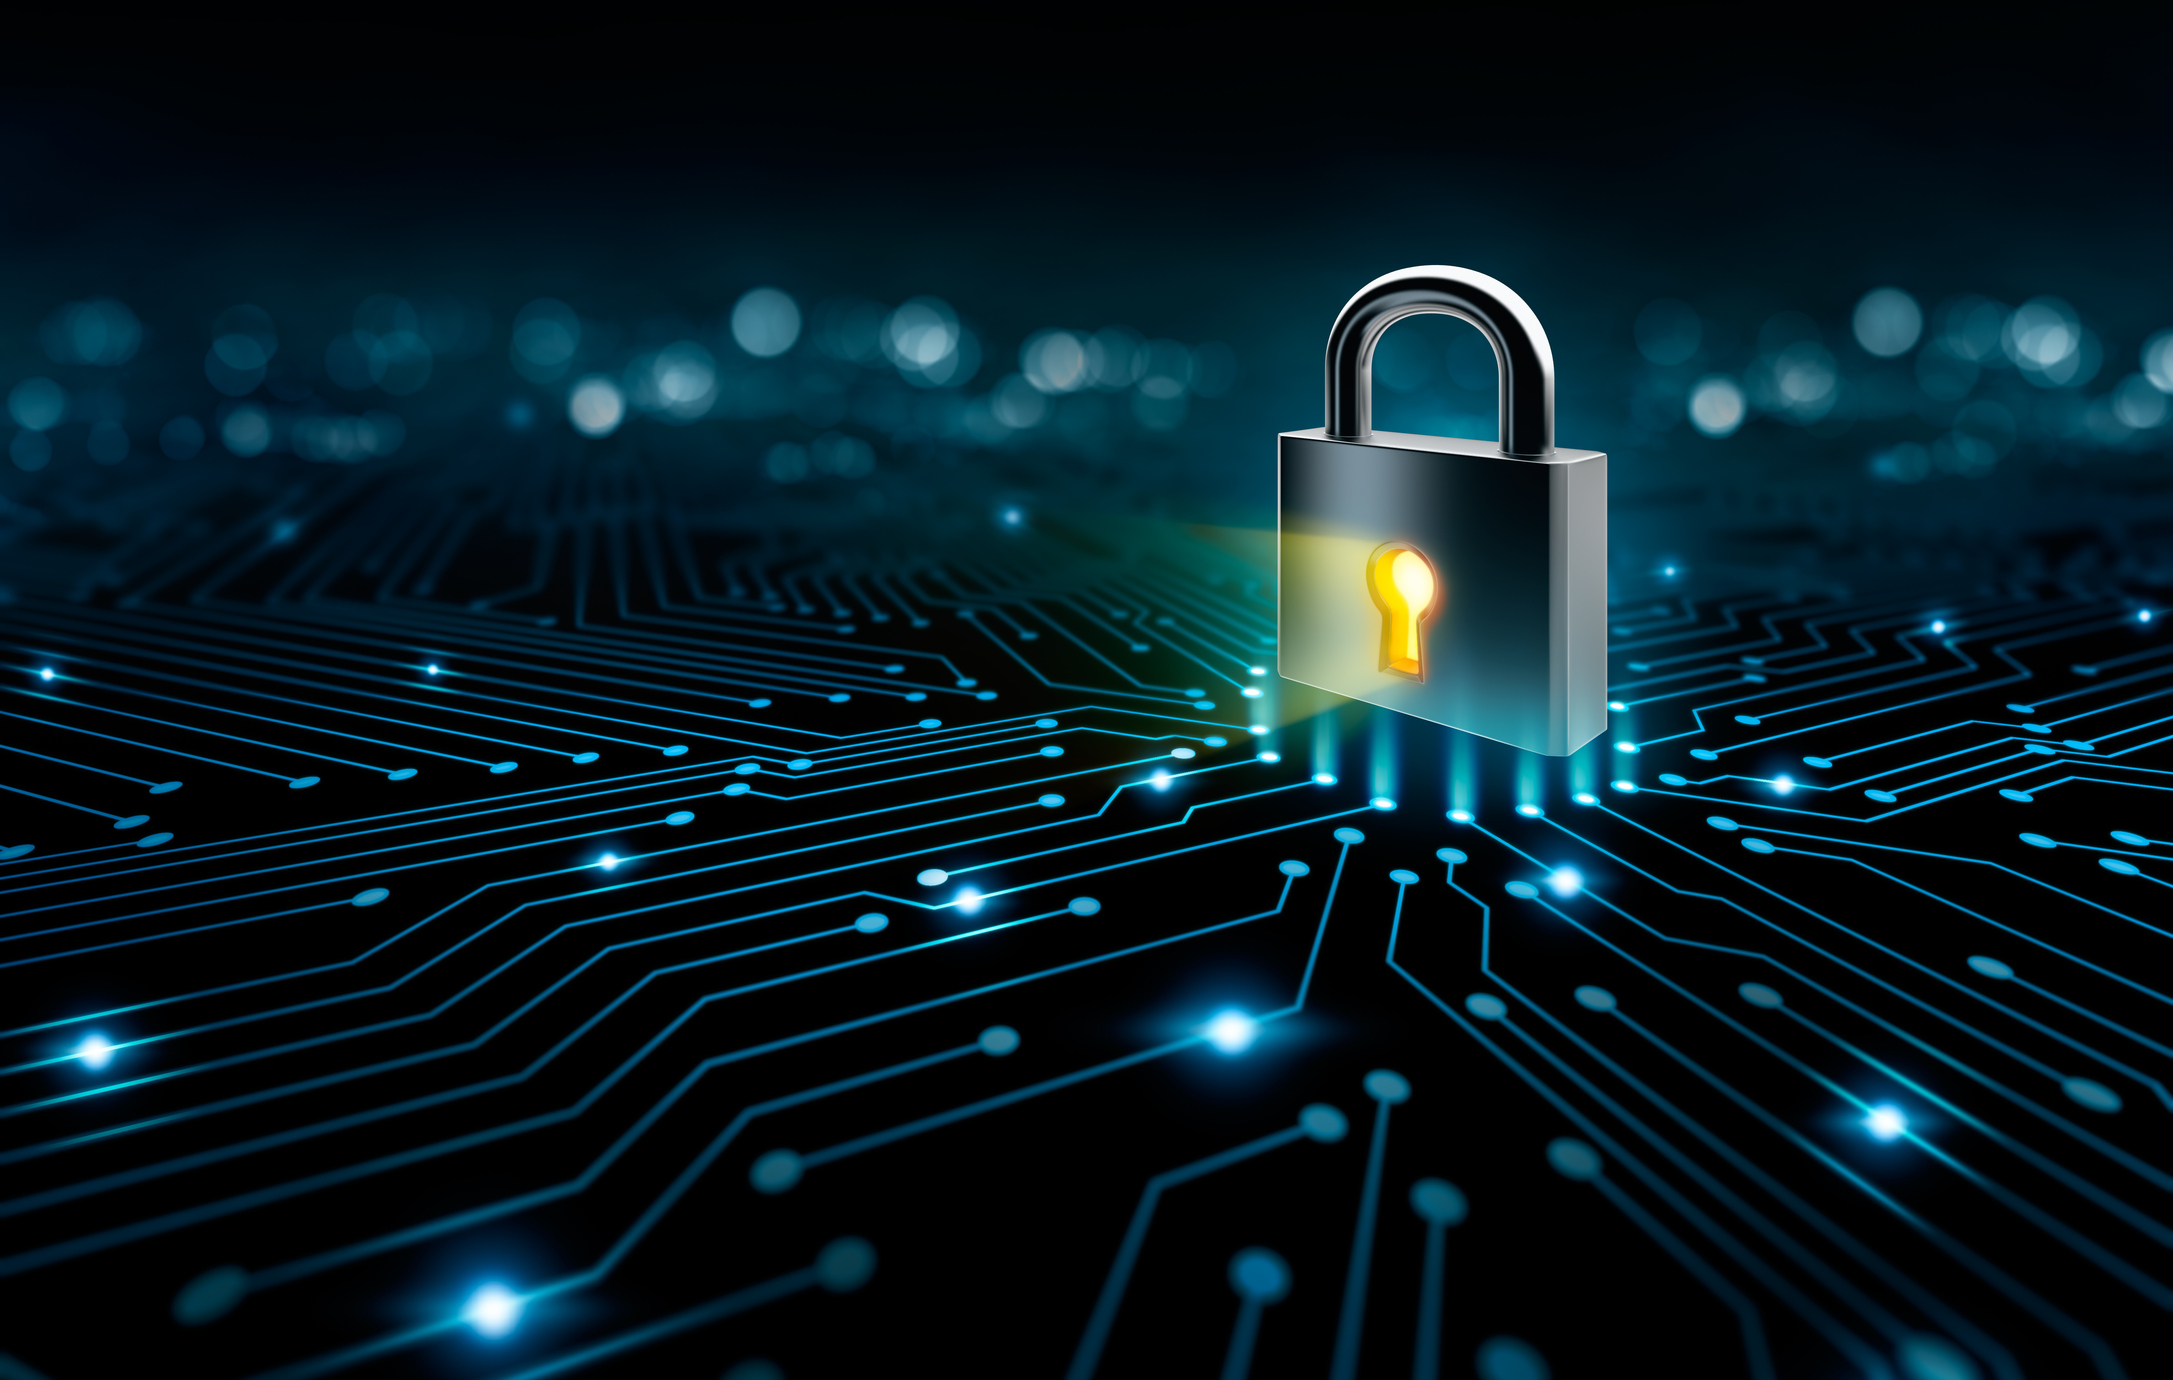

## Constructing the Original DataFrame:

In [ ]:
import pandas as pd

# Reading the dataframe from the csv.
Original_Dataframe = pd.read_csv("top_200_password_2020_by_country.csv")

# Printing the dataframe.
Original_Dataframe

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds
0,au,Australia,1,123456,308483,< 1 second,1.0,0
1,au,Australia,2,password,191880,< 1 second,5.0,0
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800
3,au,Australia,4,password1,86884,< 1 second,16.0,0
4,au,Australia,5,123456789,75856,< 1 second,2.0,0
...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200


In [ ]:
# Dropping unused columns.

Dataframe_1 = Original_Dataframe.drop(['country_code','Global_rank'],axis=1)
data = Dataframe_1.drop(Dataframe_1.columns[-1], axis=1)

# What is the quantity of people (grouped by country) being affected by having a password in the top 50 of their country. Should we be worried?

In [ ]:
# Grouping the data by country and sum the user count for each group
df_grouped = Dataframe_1.groupby('country').sum()['User_count']

# Printing the resulting DataFrame
df_grouped

country
Australia 3083341
Austria 695307
Belgium 729661
Brazil 4943358
Canada 5277926
Chile 846354
China 14739683
Colombia 1379631
Czech Republic 2288530
Denmark 862571
Estonia 169656
Finland 268236
France 16160255
Germany 28364318
Greece 861187
Hungary 1159682
India 8186249
Indonesia 3223828
Ireland 590381
Israel 793908
Italy 14030845
Japan 1906700
Korea 910432
Latvia 181072
Lithuania 406310
Malaysia 1359725
Mexico 2162221
Netherlands 1636625
New Zealand 1367054
Nigeria 757126
Norway 528173
Philippines 2750631
Poland 4412538
Portugal 2282038
Romania 1509270
Russia 146837497
Saudi Arabia 547759
Slovak Republic 702289
South Africa 609061
Spain 5493452
Sweden 1194218
Switzerland 657863
Thailand 2055344
Turkey 3944162
Ukraine 1829898
United Arab Emirates 529433
United Kingdom 7440559
United States 31229262
Vietnam 6026634
Name: User_count, dtype: int64

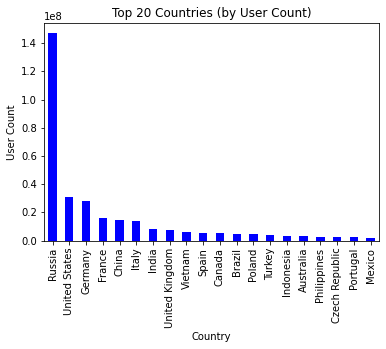

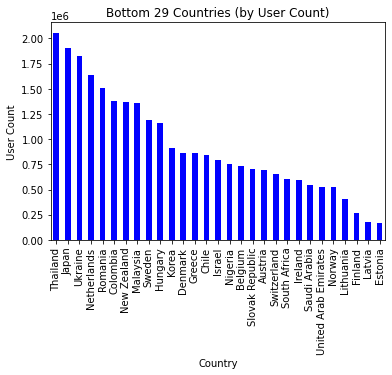

In [ ]:
import matplotlib.pyplot as plt

# Grouping the data by country and sum the user count for each group
df_grouped = Dataframe_1.groupby('country').sum()['User_count']

# Sorting the data by user count
df_sorted = df_grouped.sort_values(ascending=False)

# Spliting the data into two groups of countries (one of 20 the other one 29)
df1 = df_sorted.head(20)
df2 = df_sorted.tail(29)

# Ploting the first group of 20 countries as a bar plot
df1.plot.bar(color='blue', title='Top 20 Countries (by User Count)')
plt.xlabel('Country')
plt.ylabel('User Count')
plt.show()

# Ploting the second group of 29 countries as a bar plot
df2.plot.bar(color='blue', title='Bottom 29 Countries (by User Count)')
plt.xlabel('Country')
plt.ylabel('User Count')
plt.show()

 As an extra example, we can use crosstab to analize in how many countries does an specific password appear.
 Using '123456' as an example (appears in 49 countries).

In [ ]:
# Creating a table where only data from 123456 is collected 

crosstab_table = Dataframe_1[Dataframe_1['Password'] == '123456']


crosstab_table = pd.crosstab(crosstab_table['country'], crosstab_table['Password'])

# Displaying table
crosstab_table


Password              123456
country                     
Australia                  1
Austria                    1
Belgium                    1
Brazil                     1
Canada                     1
Chile                      1
China                      1
Colombia                   1
Czech Republic             1
Denmark                    1
Estonia                    1
Finland                    1
France                     1
Germany                    1
Greece                     1
Hungary                    1
India                      1
Indonesia                  1
Ireland                    1
Israel                     1
Italy                      1
Japan                      1
Korea                      1
Latvia                     1
Lithuania                  1
Malaysia                   1
Mexico                     1
Netherlands                1
New Zealand                1
Nigeria                    1
Norway                     1
Philippines                1
Poland        

## Conclusion
Although the user count in some places may be high, it is important to take into consideration the proportion of the population that this number represents. For example, a high user count in a country with a large population may not be as concerning as a high user count in a country with a smaller population. That being said, having a high user count is still alarming, even if the number is low proportionally, as it could still potentially affect a large number of people. It is important to take steps to address the issue, regardless of the proportion of the population it affects, in order to protect individuals and prevent further harm.

# Is there a relation of the country's education in relation with how relatively the safe or aware the people are in terms of their cyberprotection?

In [ ]:
# Reading the Dataframe_2 from the csv.
Dataframe_2 = pd.read_csv("qs-world-university-rankings-2017-to-2022-V2.csv")

# Fixing some not found countries
Dataframe_2['country'] = Dataframe_2['country'].replace('China (Mainland)', 'China')
Dataframe_2['country'] = Dataframe_2['country'].replace('South Korea', 'Korea')
Dataframe_2['country'] = Dataframe_2['country'].replace('Slovakia', 'Slovak Republic')
Dataframe_1 = Dataframe_1.drop(Dataframe_1[Dataframe_1['country'] == 'Nigeria'].index)

# Getting countries on the first df and looking if the second df has them.
Dataframe_countries = Dataframe_1['country'].drop_duplicates()
Df_countries_present = Dataframe_countries.isin(Dataframe_2['country'])
Df_countries_present = pd.DataFrame({'country_name':data['country'].drop_duplicates(),'country_bool':Df_countries_present})

# Looking for countries that are not present. (should be empty)
Df_countries_not_present = Df_countries_present.loc[Df_countries_present['country_bool']==False]
Df_countries_not_present


,country_name,country_bool


In [ ]:
# Merging countries so we can display their top password along with how well is their education.
df_merged = pd.merge(Dataframe_1.drop_duplicates('country'), Dataframe_2.drop_duplicates('country'), on='country', how='left')

# Removing unused column
df_merged.drop(columns=['Rank'], inplace=True)

# Replacing NaN values with the mean of the column (this can affect some of our results, but since there's only about 5 NaN values
# it shouldn't be a big factor.)
df_merged.fillna(df_merged.mean(), inplace=True)
df_merged["score"] = df_merged["score"].astype(int)


# Changing all the values to 1 since every password top ranking password takes less than second.
df_merged.drop('Time_to_crack_in_seconds',axis=1)
df_merged["Time_to_crack"] = 1


# Spliting the values in rank_display column to replace values from universities with multiple ranks and formating tables for further
# computation.
df_merged["rank_display"] = df_merged["rank_display"].str.split("-", expand=True)[0]
df_merged["rank_display"] = df_merged["rank_display"].astype(int)
df_merged["Time_to_crack"] = df_merged["Time_to_crack"].astype(int)

df_merged

<ipython-input-18-28d1dcbcf6c0>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_merged.fillna(df_merged.mean(), inplace=True)



,country,Password,User_count,Time_to_crack,Time_to_crack_in_seconds,university,year,rank_display,score,link,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Australia,123456,308483,1,0,The Australian National University,2017,22,87,https://www.topuniversities.com/universities/a...,Canberra,Oceania,https://www.topuniversities.com/sites/default/...,Public,Very High,9.0,"6,496",L,"1,763"
1,Austria,123456,100939,1,0,University of Vienna,2017,155,53,https://www.topuniversities.com/universities/u...,Vienna,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,12.0,"14,514",XL,"3,637"
2,Belgium,123456,78777,1,0,KU Leuven,2017,79,67,https://www.topuniversities.com/universities/k...,Leuven,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,18.0,"8,485",XL,"2,677"
3,Brazil,123456,1003925,1,0,Universidade de São Paulo,2017,120,59,https://www.topuniversities.com/universities/u...,São Paulo,Latin America,https://www.topuniversities.com/sites/default/...,Public,Very High,13.0,"1,858",XL,"4,943"
4,Canada,123456,570178,1,0,McGill University,2017,30,84,https://www.topuniversities.com/universities/m...,Montreal,North America,https://www.topuniversities.com/sites/default/...,Public,Very High,7.0,"10,827",L,"3,876"
5,Chile,123456,137460,1,0,Pontificia Universidad Católica de Chile (UC),2017,147,54,https://www.topuniversities.com/universities/p...,Santiago,Latin America,https://www.topuniversities.com/sites/default/...,Private,Very High,12.0,"1,072",L,"2,343"
6,China,123456,8159358,1,0,Tsinghua University,2017,24,86,https://www.topuniversities.com/universities/t...,Beijing,Asia,https://www.topuniversities.com/sites/default/...,Public,Very High,6.0,"5,420",XL,"6,174"
7,Colombia,123456,257728,1,0,Universidad Nacional de Colombia,2017,269,38,https://www.topuniversities.com/universities/u...,Bogotá,Latin America,https://www.topuniversities.com/sites/default/...,Public,High,14.0,335,XL,"3,055"
8,Czech Republic,123456,304929,1,0,Charles University,2017,302,36,https://www.topuniversities.com/universities/c...,Prague,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,9.0,"9,080",XL,"5,019"
9,Denmark,123456,155843,1,0,University of Copenhagen,2017,68,70,https://www.topuniversities.com/universities/u...,Copenhagen,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,4.0,"4,135",XL,"7,293"


#### The fact that the password "123456" was found to be the most commonly used password in various countries and cultures suggests that there may be some underlying factors that influence our choices of passwords that transcend education. One possibility is that humans have a natural tendency to look for and use patterns in their everyday lives. This may lead us to choose passwords that are easy to remember and follow a certain pattern, even if they are not very secure.

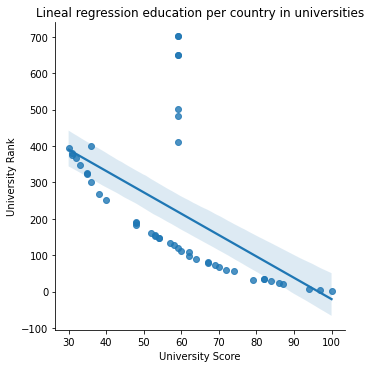

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a linear regression, looking for a regression between school's score and university rank
sns.lmplot(x="score", y="rank_display", data=df_merged)
plt.title("Lineal regression education per country in universities")
plt.xlabel("University Score")
plt.ylabel("University Rank")
plt.show()

#### This is important to visualize because it helps us to confirm that our data follows a linear relationship and that our linear regression model is appropriate for the data. By examining the plot of the data, we can be more confident in the results of our analysis when comparing school scores with password security.

<Figure size 1440x360 with 0 Axes>

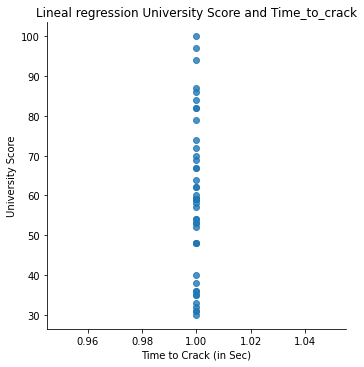

In [ ]:

plt.figure(figsize=(20, 5))
# Create a linear regression plot using seaborn
sns.lmplot(x="Time_to_crack", y="score", data=df_merged)

# Set the plot's title, x-axis label, and y-axis label
plt.title("Lineal regression University Score and Time_to_crack")
plt.ylabel("University Score")
plt.xlabel("Time to Crack (in Sec)")

plt.show() 

###############################
# No lineal Regression found  #
###############################

## Conclusion

Based on the results of the lineal regression plot, it appears that the country's education does not have a significant effect on safe or aware people may be of their cybersecurity. This may be (like previously said) because humans tend to favor patterns and are prone to using simple, predictable passwords or that school's population may not have a big impact to have a sway on the top ranking password; a fair counter argument could be that most people use "123456" as a burner password and they would be more likely to use "safer" password when using services that could be harmful if hacked such as banks or goverment services. It would be interesting to further analyze the data to see if education becomes a more significant factor as the password ranks lower in the chart. It is possible that as education levels improve, individuals may become more aware of the importance of using strong, unique passwords and may be more likely to deviate from common patterns like "123456" but further research and analysis would be needed to confirm this hypothesis.

# What other characteristic (aside from patterns) can we glance that tend to trend in the most used passwords?

In [ ]:
import re

# Separating passwords in 3 categories : Mixed, Letters only , Numbers only.

def separate_passwords(passwords):
    numeric_passwords = []
    letter_passwords = []
    mixed_passwords = []
    all_mixed_passwords = []
    for password in passwords:
        if re.match(r'^\d+$', password):
            numeric_passwords.append(password)
        elif re.match(r'^[a-zA-Z]+$', password):
            letter_passwords.append(password)
        else:
            mixed_passwords.append(password)
        all_mixed_passwords.append(password)    
    return numeric_passwords, letter_passwords, mixed_passwords, all_mixed_passwords 

numeric_passwords, letter_passwords, mixed_passwords, all_mixed_passwords = separate_passwords(Dataframe_1.drop_duplicates('Password')['Password'])
print(f'Numeric passwords: {numeric_passwords}')
print(f'Letter passwords: {letter_passwords}')
print(f'Mixed passwords: {mixed_passwords}')
print(f'Mixed passwords: {all_mixed_passwords}')

Numeric passwords: ['123456', '123456789', '12345', '12345678', '1234567', '111111', '1234', '1234567890', '123123', '000000', '654321', '123', '666666', '123321', '121212', '1111', '12356', '987654321', '11111', '12356789', '159753', '112233', '11111111', '222222', '55555', '7777777', '7153', '789456', '102030', '10203', '101010', '142536', '131313', '123654', '124578', '12345678910', '159357', '147258369', '147258', '147852', '10101', '10203040', '134679', '123789', '123654789', '121314', '741852', '246810', '789456123', '987654', '852456', '123123123', '741852963', '212121', '456123', '147852369', '963852741', '252525', '696969', '54321', '88888888', '147369', '3344521', '123456123456', '888666', '585858', '19491001', '369258147', '9876543210', '521314', '11112222', '120120', '222333', '774517397', '520123', '147896325', '555888', '999888', '112421', '686868', '159951', '787878', '121121', '7788521', '234567', '565656', '159159', '1233211234567', '5203344', '223344', '123456654321',

## What defines a strong password?

https://www.webroot.com/us/en/resources/tips-articles/how-do-i-create-a-strong-password#:~:text=What%20Makes%20a%20Password%20Strong,information%2C%20and%20no%20dictionary%20words.

Length: Strong passwords are at least 8 characters long. The longer the password, the harder it is to guess.

Complexity: Strong passwords include a combination of upper and lower case letters, numbers, and special characters. This makes it harder for hackers to use dictionaries or other methods to guess your password.

Uniqueness: Strong passwords are unique and not based on common patterns, words or phrases. They should not be the same as passwords you have used in the past, and should not be shared with others.

Non-guessable: Strong passwords are not easily guessable by others. This means avoiding using personal information (such as your name or birthdate) in your password, as well as avoiding common patterns or sequences (such as "qwerty" or "123456").

### A quick glance (Numeric passwords)
Most of the passwords in this subset ('123456', '123456789', '12345',...) are considered unsafe because they violate several important password security guidelines. These guidelines include the length of the password, its complexity, and its Non-guessable trait. Many of these passwords are short (6-8 characters) and do not include any letters, which makes them easier to hack and less unique. In addition, many of these passwords follow predictable patterns, which makes them even more guessable by others and by automated tools.

### A quick glance (Letter passwords)
Most of the passwords in this subset ('charlie','chocolate','soccer','dragon','pokemon',...) are based on common words or phrases that are easily guessable and removes uniqueness from them, in addition, they are not complex, any of these passwords do not include a combination of upper and lower case letters, numbers, or special characters, which makes them easier to guess. 


### A quick glance (Mixed passwords)
This is already much better than only letters or only numbers, this is mainly because they include a wider range of characters (or symbols) and are a lot less predictable, meaning that hackers have to adapt to the posibility than your password may include 1-9 and a-z symbols. But even though they may win in complexity, they still fail at non-gessability, lenght and uniqueness; Since most passwords have either 5-8 characters, use common patterns such as 'passwords or 'qwerty' and/or they use common words such as charlie, myspace, mother, etc.


## Conclusion

From the analysis of these three types of passwords, it is clear that none of them are secure enough to protect sensitive information. Numeric passwords are too short and predictable, letter passwords are based on common words and lack complexity, and mixed passwords may be slightly more complex but still lack uniqueness and non-guessability. In order to create a secure password, it is important to follow best practices such as using a combination of upper and lower case letters, numbers, and special characters, using a long and unique passphrase that is not based on any common words or patterns, and avoiding using the same password for multiple accounts.

# Can we use machine learning (clustering) to find or at the very least automate the need to look for security trends by ourselves?

We as developers "somos vagos", knowing if we are able to automate the detection of unsafe password is beneficial not only for us but to the overall security of our countries. Automation can help us identify common passwords that are easy to guess or hack, as well as find patterns in how people create and use passwords. By identifying and automatizing the look for these new trends we can potentially reach a wider audience and help prevent even more cyber attacks. So the question still stands...Can we do it?

Some of the code from this section can be found in the following pages:

https://stackoverflow.com/questions/18057962/regex-pattern-including-all-special-characters

https://stackoverflow.com/questions/4187356/regular-expression-to-extract-numbers-from-a-string

https://www.geeksforgeeks.org/count-uppercase-lowercase-special-character-numeric-values/

https://cybernews.com/best-password-managers/most-common-passwords/

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(




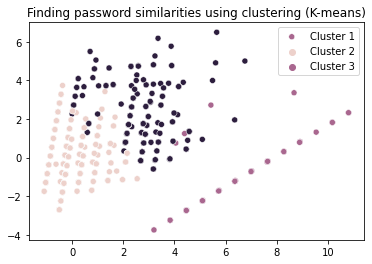

,Password,cluster_labels,0,1,2,4,5,6
0,123456,1,6,6,6,False,True,False
1,password,0,8,0,0,False,False,True
2,lizottes,0,8,0,0,False,False,True
3,password1,0,9,1,1,False,False,True
4,123456789,1,9,9,9,False,True,False
...,...,...,...,...,...,...,...,...
4132,hongngoc,0,8,0,0,False,False,False
4133,anhtien,0,7,0,0,False,False,True
4134,lanhuong,0,8,0,0,False,False,False
4135,congacon,0,8,0,0,False,False,False


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def extract_features(password):
    """Extracts features from a password string, what do we consider  a feature?
        1.  length of the password
        2.  number of digits in the password
        3.  special characters in the password
        4.  any up or low case letters in the password
        5.  presence of common patterns '123'
        6.  presence of common patterns 'qwerty'
    """

    features = []
    
    # Extracting the length of the password as a feature
    features.append(len(password))
    
    # Extracting the number of digits in the password as a feature
    num_digits = len(re.findall(r'\d', password))
    if num_digits > 0:
        features.append(num_digits)
    else:
        features.append(0)
    
    # Extracting the number of special characters in the password
    num_special_chars = len(re.findall(r'[$&+,:;=?@#|<>.-^*()%!]', password))
    if num_special_chars > 0:
        features.append(num_special_chars)
    else:
        features.append(0)

    # Extracting if it has any up or low case letters in the password
    has_lowercase = any(c.islower() for c in password)
    has_uppercase = any(c.isupper() for c in password)
    
    # Extracting the presence of common patterns or sequences in the password
    has_123 = '123' in password
    has_qwerty = any(c in 'qwerty' for c in password)
    features.extend([has_lowercase, has_uppercase, has_123, has_qwerty])
    
    # Adding default values for missing features
    num_features = 6
    while len(features) < num_features:
        features.append(False)
    features.append(password)
    return features



# Extracting features from the password strings
features = [extract_features(p) for p in all_mixed_passwords]
features = pd.DataFrame(features)


# Using KMeans to cluster the passwords based on their features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.iloc[:,0:7])
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(scaled_features)


# Using PCA to plot the data in a 2D plot
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)


# Ploting using PCA
sns.scatterplot(pca_features[:, 0], pca_features[:, 1],hue=cluster_labels)
plt.legend( labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title("Finding password similarities using clustering (K-means)")
plt.show()

features['cluster_labels']= cluster_labels
features = features.reindex(columns=[7,'cluster_labels',0,1,2,4,5,6])
features = features.rename(columns={7: 'Password'})
features

In [ ]:
features[features['cluster_labels']==0] # Contains mostly passwords with letters

,Password,cluster_labels,0,1,2,4,5,6
1,password,0,8,0,0,False,False,True
2,lizottes,0,8,0,0,False,False,True
3,password1,0,9,1,1,False,False,True
7,qwerty,0,6,0,0,False,False,True
9,holden,0,6,0,0,False,False,True
...,...,...,...,...,...,...,...,...
4132,hongngoc,0,8,0,0,False,False,False
4133,anhtien,0,7,0,0,False,False,True
4134,lanhuong,0,8,0,0,False,False,False
4135,congacon,0,8,0,0,False,False,False


In [ ]:
features[features['cluster_labels']==1] # Contains mostly passwords with numbers

,Password,cluster_labels,0,1,2,4,5,6
0,123456,1,6,6,6,False,True,False
4,123456789,1,9,9,9,False,True,False
5,12345,1,5,5,5,False,True,False
8,12345678,1,8,8,8,False,True,False
11,1234567,1,7,7,7,False,True,False
...,...,...,...,...,...,...,...,...
3691,135792468,1,9,9,9,False,False,False
3862,1111111111,1,10,10,10,False,False,False
3870,93626597,1,8,8,8,False,False,False
3873,445566,1,6,6,6,False,False,False


In [ ]:
features[features['cluster_labels']==2] # Contains mostly passwords with mixed letters and passwords

,Password,cluster_labels,0,1,2,4,5,6
6,abc123,2,6,3,3,False,True,False
17,qwerty123,2,9,3,3,False,True,True
35,123abc,2,6,3,3,False,True,False
60,hello123,2,8,3,3,False,True,True
83,password123,2,11,3,3,False,True,True
...,...,...,...,...,...,...,...,...
3860,dubai123,2,8,3,3,False,True,False
3867,pakistan123,2,11,3,3,False,True,True
3869,a197900,2,7,6,6,False,False,False
3896,Parola12,2,8,2,3,True,False,True


## Conclusion

Machine learning can be used to differentiate safe passwords from unsafe ones by extracting relevant features from password datasets and clustering them based on their safety. By analyzing the characteristics of safe and unsafe passwords, such as length, complexity, and commonality, machine learning algorithms can learn to identify patterns that distinguish safe passwords from those that are more likely to be compromised. This section is an example of how a machine learning model could be trained to identify passwords that are too short, contain simple patterns, or are commonly used, and classify them as unsafe/safe. This answers our main question: " Can we automate the look for common trends and passwords?". And the Anwser is a resound YES.